# TD2 part 1
Dans ce TD, nous allons construire un RNN from scratch avec Pytorch, en suivant les étapes suivantes:

- Sur un problème non-linéaire, nous allons construire un multi-layers perceptron
- Sur un problème de texte, nous utiliserons pytorch pour optimiser un RNN


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Problème simple

## Données exemples
Nous allons construire des données $y = \beta^* X + b$


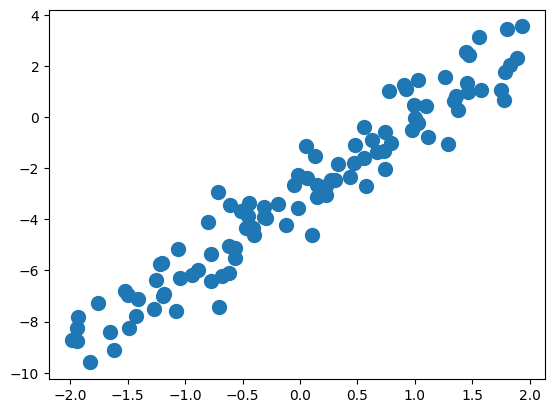

In [3]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * x + b_star + noise

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

### Constuire l'optimizer

- Avec torch.nn.Parameter(), créer le paramètre beta qui sera optimisé. Les predictions du modèle sont égales à $\beta \times X$ 
- Avec torch.nn.MSELoss, déclarer la loss entre les prédictions et le résultat réel. loss.backward() pour mettre à jour les gradients
- Avec torch.optim.Adam, déclarer un optimizer
- Construisez la boucle qui, pour n_epochs, va reset les gradients, calculer la loss, mettre à jour les gradients et faire un pas pour optimiser beta

In [4]:
beta = torch.nn.Parameter(torch.randn(n, 1))
optim = torch.optim.Adam([beta], lr=0.1)
loss_fn = torch.nn.MSELoss()


n_epochs = 1000


for t in range(n_epochs):
    optim.zero_grad()
    y_pred = beta * x
    
    loss = loss_fn(y_pred, y)
    print(loss)
    
    loss.backward()
    optim.step()
    

tensor(21.9317, grad_fn=<MseLossBackward0>)
tensor(21.1247, grad_fn=<MseLossBackward0>)
tensor(20.3417, grad_fn=<MseLossBackward0>)
tensor(19.5825, grad_fn=<MseLossBackward0>)
tensor(18.8473, grad_fn=<MseLossBackward0>)
tensor(18.1357, grad_fn=<MseLossBackward0>)
tensor(17.4477, grad_fn=<MseLossBackward0>)
tensor(16.7827, grad_fn=<MseLossBackward0>)
tensor(16.1405, grad_fn=<MseLossBackward0>)
tensor(15.5204, grad_fn=<MseLossBackward0>)
tensor(14.9220, grad_fn=<MseLossBackward0>)
tensor(14.3448, grad_fn=<MseLossBackward0>)
tensor(13.7881, grad_fn=<MseLossBackward0>)
tensor(13.2513, grad_fn=<MseLossBackward0>)
tensor(12.7336, grad_fn=<MseLossBackward0>)
tensor(12.2347, grad_fn=<MseLossBackward0>)
tensor(11.7539, grad_fn=<MseLossBackward0>)
tensor(11.2908, grad_fn=<MseLossBackward0>)
tensor(10.8449, grad_fn=<MseLossBackward0>)
tensor(10.4157, grad_fn=<MseLossBackward0>)
tensor(10.0027, grad_fn=<MseLossBackward0>)
tensor(9.6054, grad_fn=<MseLossBackward0>)
tensor(9.2233, grad_fn=<MseLossBa

In [5]:
beta.shape

torch.Size([100, 1])

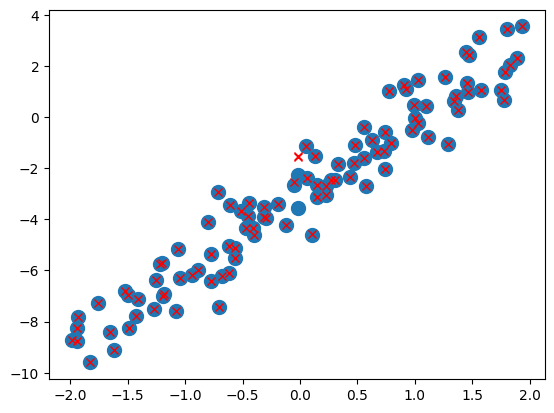

In [6]:
# Plot des predictions
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, beta.detach() * x, 'rx')

# Multi-layers perceptron

## Données exemples

Ici, on a un modèle $y = ax² + b$

In [ ]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * (x ** 2) + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

Nous allons construire un Pytorch modèle. Dans ce framework, on définit la fonction "forward" qui prend en argument les inputs et retourne les prédictions.

A l'aide de torch.nn.Module et de différentes layers (torch.nn.Linear, torch.nn.ReLU), terminez la classe ci-dessous pour créer un multi-layers perceptron 

In [83]:
class MLP(torch.nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size, 16)
        self.layer2 = torch.nn.Linear(16, 4)
        self.layer3 = torch.nn.Linear(4, 1)

    def forward(self, X): 
        X = self.layer1(X)
        X = torch.nn.functional.leaky_relu(X)  
        X = self.layer2(X)
        X = torch.nn.functional.leaky_relu(X)
        X = self.layer3(X)

        return torch.nn.functional.leaky_relu(X)
    
    def fit(self, x, y, optimizer, nb_epochs, learning_rate, loss):
        optimizer = optimizer(self.parameters(), lr=learning_rate)
        #optimizer = torch.optim.Adam(self.parameters(), lr=0.1)
        
        for epoch in range(nb_epochs):
            optimizer.zero_grad()
           
            y_pred = self.forward(x)
            
            l = loss(y_pred, y)
            l.backward()
            optimizer.step()
            if epoch % 10 == 0:
                print(epoch, l)
            
        
    
    

En utilisant le travail précédent, faite une cellule utilisant un torch optimizer pour optimiser le MLP 

In [84]:
x.shape
y.shape

torch.Size([100, 1])

In [85]:
model = MLP(x.shape[1])
model.fit(x, y, optimizer=torch.optim.Adam, learning_rate=0.1, loss=torch.nn.MSELoss(), nb_epochs=100)
y_pred = model.forward(x).detach()
y_pred.shape

0 tensor(23.0817, grad_fn=<MseLossBackward0>)
10 tensor(18.7573, grad_fn=<MseLossBackward0>)
20 tensor(8.9430, grad_fn=<MseLossBackward0>)
30 tensor(3.4529, grad_fn=<MseLossBackward0>)
40 tensor(1.1816, grad_fn=<MseLossBackward0>)
50 tensor(0.8290, grad_fn=<MseLossBackward0>)
60 tensor(0.8580, grad_fn=<MseLossBackward0>)
70 tensor(0.8260, grad_fn=<MseLossBackward0>)
80 tensor(0.7924, grad_fn=<MseLossBackward0>)
90 tensor(0.7773, grad_fn=<MseLossBackward0>)


torch.Size([100, 1])

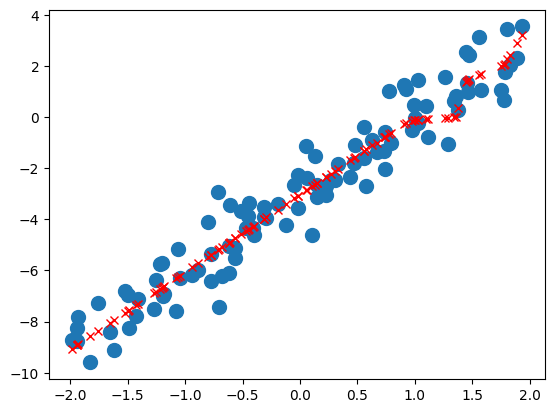

In [82]:
# Plot des predictions
plt.plot(x, y, 'o', markersize=10)
plt.plot(x, y_pred, 'rx')

# Problème de texte

On a des données prénom -> pays d'origine.
On veut utiliser un réseau de neurones qui, pour un nom, va prédire le pays d'origine en utilisant la suite de caractères.

## Extraction des données

Vous trouverez [ici](https://download.pytorch.org/tutorial/data.zip) un zip avec des fichiers \[nationalité\].txt contenant des prénoms pour chaque nationalité. <br/>
Nous allons avoir un jeu de données pays -> prénoms.

In [90]:
# Code pour générer le jeu de données
# En admettant que les fichiers ont été extraits dans data/raw/names/

import math
import numpy as np
from pathlib import Path
import random
import string
import time
import unicodedata

path = Path("../data/raw/names/")

In [94]:
def read_names(path):
    country_to_names = {}
    for file in path.iterdir():
        if not file.name.endswith(".txt"):
            continue
            
        with open(file) as f:
            names = [unicodeToAscii(line.strip()) for line in f]
        
        country = file.stem
        country_to_names[country] = names

    return country_to_names

# Handling ASCII stuff
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [104]:
country_to_names = read_names(path)
country_to_names

{'French': ['Abel',
  'Abraham',
  'Adam',
  'Albert',
  'Allard',
  'Archambault',
  'Armistead',
  'Arthur',
  'Augustin',
  'Babineaux',
  'Baudin',
  'Beauchene',
  'Beaulieu',
  'Beaumont',
  'Belanger',
  'Bellamy',
  'Bellerose',
  'Belrose',
  'Berger',
  'Beringer',
  'Bernard',
  'Bertrand',
  'Bisset',
  'Bissette',
  'Blaise',
  'Blanc',
  'Blanchet',
  'Blanchett',
  'Bonfils',
  'Bonheur',
  'Bonhomme',
  'Bonnaire',
  'Bonnay',
  'Bonner',
  'Bonnet',
  'Borde',
  'Bordelon',
  'Bouchard',
  'Boucher',
  'Brisbois',
  'Brodeur',
  'Bureau',
  'Caron',
  'Cavey',
  'Chaput',
  'Charbonneau',
  'Charpentier',
  'Charron',
  'Chastain',
  'Chevalier',
  'Chevrolet',
  'Cloutier',
  'Colbert',
  'Comtois',
  'Cornett',
  'Cote',
  'Coupe',
  'Courtemanche',
  'Cousineau',
  'Couture',
  'Daniau',
  "D'aramitz",
  'Daviau',
  'David',
  'Deforest',
  'Degarmo',
  'Delacroix',
  'De la fontaine',
  'Deniau',
  'Deniaud',
  'Deniel',
  'Denis',
  'De sauveterre',
  'Deschamps',

## Transformation des prénoms en features

On va one-hot encode les lettres des prénoms. <br/>
Si on utilisait "a" ayant comme indice 0, "b" indice 1, ... "z" indice 25, <br/>
le prénom "abby" aurait les index suivants [0, 1, 1, 24], <br/>
ou la matrice: <br/>
[ <br/>
    \[1, 0, ..., 0, 0\] <br/>
    \[0, 1, ..., 0, 0\] <br/>
    \[0, 1, ..., 0, 0\] <br/>
    \[0, 0, ..., 1, 0\] <br/>
] <br/>

Dans les prénoms, nous avons des caractères spéciaux (comme "ö", "é", etc), donc nous utiliserons la table ASCII pour traduire les lettres en indice

## Jouons un peu avec les RNN

Le RNN (Recurrent neural network) est prévu pour prendre une série d'inputs et prédire un output.

In [96]:
# La table ascii a 128 caractères, une lettre one-hot encodée est donc un vecteur de taille 128
# Les inputs seront de tailles 128
model = torch.nn.RNN(input_size=128, hidden_size=1)
# Hidden_size est la dimension de l'output

In [97]:
# La lettre "a" est l'indice 97 dans la table ascii
letter_a = torch.zeros((1, 128))
letter_a[0][97] = 1

output, hidden = model(letter_a)
output

tensor([[0.4284]], grad_fn=<SqueezeBackward1>)

In [98]:
# Le prénom "Abby" est une suite de 4 lettres# La lettre "a" est l'indice 97 dans la table ascii
name_abby = torch.zeros((1, 4, 128))
name_abby[0][0][97] = 1
name_abby[0][1][98] = 1
name_abby[0][2][98] = 1
name_abby[0][2][121] = 1

output, hidden = model(name_abby)
# On a un output pour chaque lettre. On considère que l'output de la dernière lettre est la nationalité à trouver
output

tensor([[[ 0.4284],
         [-0.8273],
         [-0.9739],
         [-0.2197]]], grad_fn=<StackBackward0>)

## Un RNN et une loss pour notre dataset
Nous avons un problème de classification, nous allons utiliser la cross-entropy loss.

Dans notre problème, nous avons 18 classes différentes (18 nationalités).
Pour un prénom, notre réseau de neurones devra sortir la probabilité que le nom appartienne à chaque pays (un vecteur de taille 18, dont la somme fait 1).

Notre réseau aura donc un output de taille 18, et nous appliquerons la fonction softmax pour en faire des probabilités (la somme des 18 outputs fera 1). <br/>
Fonction softmax:

$ \sigma(x)_i = \frac{e^{x_i}}{\sum_{j=0}^{K} e^{x_j}} $

In [99]:
model = torch.nn.RNN(input_size=128, hidden_size=18)
loss = torch.nn.CrossEntropyLoss()

In [100]:
output, hidden = model(name_abby)

output.shape

torch.Size([1, 4, 18])

In [101]:
# Shape est 1 (un prénom), 4 (4 lettres), 18 (une valeur pour chacune des nationalités)

# On utilise l'output de la dernière lettre
output = output[:, -1, :]

proba = torch.nn.functional.softmax(output)
proba

/tmp/ipykernel_38535/4147069149.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  proba = torch.nn.functional.softmax(output)


tensor([[0.0547, 0.0536, 0.0482, 0.0532, 0.0613, 0.0459, 0.0550, 0.0610, 0.0658,
         0.0412, 0.0590, 0.0587, 0.0616, 0.0536, 0.0599, 0.0655, 0.0445, 0.0574]],
       grad_fn=<SoftmaxBackward0>)

In [102]:
# Pour différents label (nationalité du prénom "Abby"), on a différentes cross-entropy loss
y = torch.zeros((1))
y = y.type(torch.LongTensor)
y[0] = 1

loss(proba, y)

tensor(2.8924, grad_fn=<NllLossBackward0>)

In [103]:
y[0] = 13

loss(proba, y)


tensor(2.8924, grad_fn=<NllLossBackward0>)

# Votre tour

Maintenant que nous avons des données, un modèle et une loss:
- Séparez vos données en train & test
- Faites une loop tirant au hasard des noms avec leur nationalité, calculez la sortie du réseau de neurones, sa loss, le gradient, et faites un step pour l'optimiser
- Une fois que vous avez un modèle qui marche, testez d'autres architectures de réseaux de neurones pour avoir le meilleur résultat.

In [105]:
country_to_names

{'French': ['Abel',
  'Abraham',
  'Adam',
  'Albert',
  'Allard',
  'Archambault',
  'Armistead',
  'Arthur',
  'Augustin',
  'Babineaux',
  'Baudin',
  'Beauchene',
  'Beaulieu',
  'Beaumont',
  'Belanger',
  'Bellamy',
  'Bellerose',
  'Belrose',
  'Berger',
  'Beringer',
  'Bernard',
  'Bertrand',
  'Bisset',
  'Bissette',
  'Blaise',
  'Blanc',
  'Blanchet',
  'Blanchett',
  'Bonfils',
  'Bonheur',
  'Bonhomme',
  'Bonnaire',
  'Bonnay',
  'Bonner',
  'Bonnet',
  'Borde',
  'Bordelon',
  'Bouchard',
  'Boucher',
  'Brisbois',
  'Brodeur',
  'Bureau',
  'Caron',
  'Cavey',
  'Chaput',
  'Charbonneau',
  'Charpentier',
  'Charron',
  'Chastain',
  'Chevalier',
  'Chevrolet',
  'Cloutier',
  'Colbert',
  'Comtois',
  'Cornett',
  'Cote',
  'Coupe',
  'Courtemanche',
  'Cousineau',
  'Couture',
  'Daniau',
  "D'aramitz",
  'Daviau',
  'David',
  'Deforest',
  'Degarmo',
  'Delacroix',
  'De la fontaine',
  'Deniau',
  'Deniaud',
  'Deniel',
  'Denis',
  'De sauveterre',
  'Deschamps',

# building dataset

In [194]:
countries = list(country_to_names.keys())
names_list = country_to_names.values()


In [232]:
biggest_name = max(names_list, key=len)
max_len = 19

In [236]:
from sklearn.preprocessing import OneHotEncoder

# building dataset 

def country_vector(country_name):
    list = np.zeros(len(countries))
    list[countries.index(country_name)] = 1
    return list

def word_vector(word):
    list = np.zeros((max_len, 128))
    print(list.shape, word, len(word))
    
    for i, letter in enumerate(word):
    
        list[i, ord(letter)] = 1
        
    return list.flatten()
    
        

X = []
y = []




In [237]:
word_vector(country_to_names['French'][0])

(19, 128) Abel 4


array([0., 0., 0., ..., 0., 0., 0.])

In [238]:
for key, list_value in country_to_names.items():
    for value in list_value:
        X.append(word_vector(value))
        y.append(country_vector(key))


(19, 128) Abel 4
(19, 128) Abraham 7
(19, 128) Adam 4
(19, 128) Albert 6
(19, 128) Allard 6
(19, 128) Archambault 11
(19, 128) Armistead 9
(19, 128) Arthur 6
(19, 128) Augustin 8
(19, 128) Babineaux 9
(19, 128) Baudin 6
(19, 128) Beauchene 9
(19, 128) Beaulieu 8
(19, 128) Beaumont 8
(19, 128) Belanger 8
(19, 128) Bellamy 7
(19, 128) Bellerose 9
(19, 128) Belrose 7
(19, 128) Berger 6
(19, 128) Beringer 8
(19, 128) Bernard 7
(19, 128) Bertrand 8
(19, 128) Bisset 6
(19, 128) Bissette 8
(19, 128) Blaise 6
(19, 128) Blanc 5
(19, 128) Blanchet 8
(19, 128) Blanchett 9
(19, 128) Bonfils 7
(19, 128) Bonheur 7
(19, 128) Bonhomme 8
(19, 128) Bonnaire 8
(19, 128) Bonnay 6
(19, 128) Bonner 6
(19, 128) Bonnet 6
(19, 128) Borde 5
(19, 128) Bordelon 8
(19, 128) Bouchard 8
(19, 128) Boucher 7
(19, 128) Brisbois 8
(19, 128) Brodeur 7
(19, 128) Bureau 6
(19, 128) Caron 5
(19, 128) Cavey 5
(19, 128) Chaput 6
(19, 128) Charbonneau 11
(19, 128) Charpentier 11
(19, 128) Charron 7
(19, 128) Chastain 8
(19, 12

In [239]:
X

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

In [248]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


/tmp/ipykernel_38535/80988128.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  X_train = torch.tensor(X_train, dtype=torch.float32)


In [256]:
X_train.shape

torch.Size([16059, 2432])

In [290]:
from tqdm import tqdm
from torch import nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)



    def train_model(self, x_train, y_train, n_epochs=10, batch_size=64, learning_rate=0.01):

        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)

        for epoch in tqdm(range(n_epochs)):
            total_loss = 0

            for i in range(0, x_train.size(0), batch_size):

                hidden = self.initHidden()

                optimizer.zero_grad()

            
                output, hidden = self.forward(X_train, hidden)

             
                loss = criterion(output, y_train)

              
                loss.backward()
                optimizer.step()

                total_loss += loss.item()

         
            avg_loss = total_loss / (x_train.size(0) )
            print(f'Époque [{epoch+1}/{n_epochs}], Perte moyenne: {avg_loss:.4f}')


output_size = len(torch.unique(y_train))
n_hidden = 128
rnn = RNN(X_train.size(1), n_hidden, len(countries))
rnn.train_model(X_train, y_train, n_epochs=15, learning_rate=0.01)

  7%|▋         | 1/15 [00:21<05:01, 21.53s/it]

Époque [1/15], Perte moyenne: 0.0097


 13%|█▎        | 2/15 [00:41<04:28, 20.68s/it]

Époque [2/15], Perte moyenne: 0.0017


 20%|██        | 3/15 [01:01<04:05, 20.44s/it]

Époque [3/15], Perte moyenne: 0.0008


 27%|██▋       | 4/15 [01:21<03:43, 20.28s/it]

Époque [4/15], Perte moyenne: 0.0006


 33%|███▎      | 5/15 [01:41<03:21, 20.17s/it]

Époque [5/15], Perte moyenne: 0.0006


 40%|████      | 6/15 [02:01<03:01, 20.14s/it]

Époque [6/15], Perte moyenne: 0.0006


 47%|████▋     | 7/15 [02:22<02:41, 20.15s/it]

Époque [7/15], Perte moyenne: 0.0006


 53%|█████▎    | 8/15 [02:42<02:21, 20.17s/it]

Époque [8/15], Perte moyenne: 0.0006


 60%|██████    | 9/15 [03:02<02:01, 20.25s/it]

Époque [9/15], Perte moyenne: 0.0006


 67%|██████▋   | 10/15 [03:22<01:41, 20.23s/it]

Époque [10/15], Perte moyenne: 0.0006


 73%|███████▎  | 11/15 [03:43<01:21, 20.32s/it]

Époque [11/15], Perte moyenne: 0.0006


 80%|████████  | 12/15 [04:03<01:01, 20.34s/it]

Époque [12/15], Perte moyenne: 0.0006


 87%|████████▋ | 13/15 [04:24<00:40, 20.33s/it]

Époque [13/15], Perte moyenne: 0.0006


 93%|█████████▎| 14/15 [04:44<00:20, 20.22s/it]

Époque [14/15], Perte moyenne: 0.0006


100%|██████████| 15/15 [05:04<00:00, 20.31s/it]

Époque [15/15], Perte moyenne: 0.0006


In [291]:
input = X_test
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output)
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return countries[category_i], category_i

count = 0
sum = 0
for (i, output_) in enumerate(output):
    count += 1
    if categoryFromOutput(output_) == categoryFromOutput(y_test[i]):
        sum += 1
    print(categoryFromOutput(output_), categoryFromOutput(y_test[i]))
print(sum/ count)

tensor([[-2.1250e+01, -1.6977e+01, -2.2285e+01,  ..., -1.3047e-02,
         -4.3664e+00, -3.8331e+01],
        [-4.9796e+01, -6.4115e+01, -5.6122e+01,  ...,  0.0000e+00,
         -2.8564e+01, -4.9357e+01],
        [-1.2449e+01, -1.8012e+01, -1.8256e+01,  ..., -1.0744e+00,
         -4.3401e-01, -1.2465e+01],
        ...,
        [-1.5408e+01, -6.7924e+00, -4.2401e+01,  ..., -4.2881e+00,
         -2.1474e+01, -2.4379e+01],
        [-1.9494e+01, -2.6710e+01, -4.9215e+01,  ..., -1.4979e+01,
         -1.7817e+01, -1.1847e+01],
        [-2.3409e+01, -3.4343e+01, -4.8203e+01,  ..., -3.3764e+01,
         -1.5591e+01, -2.9979e+01]], grad_fn=<LogSoftmaxBackward0>)
('Russian', 15) ('Polish', 16)
('Russian', 15) ('Russian', 15)
('Polish', 16) ('English', 6)
('Chinese', 8) ('Korean', 2)
('English', 6) ('English', 6)
('Czech', 10) ('Czech', 10)
('Arabic', 9) ('Arabic', 9)
('Spanish', 17) ('Czech', 10)
('Russian', 15) ('Russian', 15)
('Arabic', 9) ('Arabic', 9)
('Dutch', 7) ('Dutch', 7)
('Russian', 1